In [1]:
import numpy as np
from scipy.stats import pearsonr
import datetime
import pandas as pd
from scipy.stats import linregress
from netCDF4 import Dataset
from scipy.interpolate import griddata
import os
import warnings
import itertools
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import tqdm
warnings.filterwarnings("ignore")

In [2]:
means = np.full((160,160),np.nan)

days = np.arange(0,4018)
dates = [datetime.date(2010,1,1)+datetime.timedelta(days=np.int(days)) for days in days]

x_WG = np.load('/Users/carmennab/PhD/OI_PolarSnow/SnowModelLG/new_x_WG.npy') # load Will's grid, 160 x 160 array
y_WG = np.load('/Users/carmennab/PhD/OI_PolarSnow/SnowModelLG/new_y_WG.npy')

# import CS2_CPOM data
datapath = '/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_interpolated/CS2_CPOM/'
all_fbs_cpom = np.full((4018,160,160), np.nan)
for day in tqdm.tqdm(days):
    date = dates[day].strftime('%Y%m%d')
    for f in os.listdir(datapath):
        if 'FB_uncertainty' in f:
            if date in f:
                all_fbs_cpom[day] = np.load(datapath+str(f))
            else: 
                pass

for i, j in tqdm.tqdm(itertools.product(np.arange(160),
                              np.arange(160))): 
    means[i,j] = np.nanmean(all_fbs_cpom[:,i,j],axis=0)

100%|██████████████████████████████████████| 4018/4018 [00:16<00:00, 249.47it/s]
25600it [00:01, 13877.18it/s]


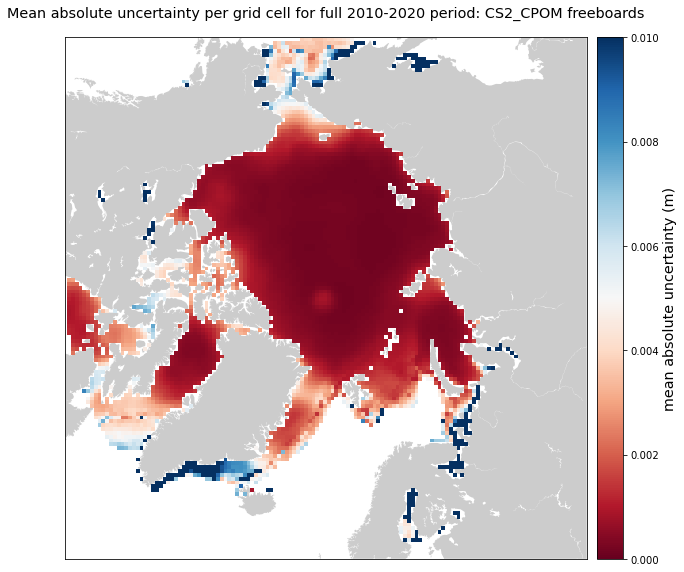

In [3]:
fig,ax = plt.subplots(1,figsize=(10,10))
m = Basemap(projection='npstere',boundinglat=60,lon_0=0, resolution='l',round=False)
m.fillcontinents(color=(0.8, 0.8, 0.8))
p_map = m.pcolormesh(x_WG,y_WG,means,cmap='RdBu',vmin=0,vmax=0.01)
a = m.colorbar(p_map) 
a.set_label('mean absolute uncertainty (m)',fontsize='x-large')
plt.title('Mean absolute uncertainty per grid cell for full 2010-2020 period: CS2_CPOM freeboards',fontsize='x-large', pad=20)
plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/AGU GRL Snow Interpolated Freeboards/figures/uncertainties.png',bbox_inches = "tight")

In [4]:
print(np.nanmax(means))
print(np.nanmin(means))

0.1
0.00011961148771278792
